# Pandas intro

In [2]:
import pandas as pd
import numpy as np

# Pandas Documentation

Get familiar with the Pandas documentation:
- Neat structure
- Let the documentation do some of the heavy lifting for you!

**Overview of DataFrames and their attributes and methods:**
- [Link to Pandas DataFrame docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) | Pandas Website > API Reference > DataFrames > pandas.DataFrame
    - 16 attributes
    - 195 methods
        - with 1-n number of parameters
        
**Overview of Series objects and their attributes and methods:**
- [Link to Pandas DataFrame docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) | Pandas Website > API Reference > DataFrames > pandas.Series
    - 23 attributes
    - 188 methods
        - with 1-n number of parameters
        
**Attencione!** There is lots of overlap between attributes and methods for Pandas DataFrame objects and Pandas Series objects 


*Don't forget! shift + tab for fast access to docs*

# Pandas `DataFrame()`

## Creating and saving

### From data

In [ ]:
lst1 = [1,2,3]
lst2 = [9,8,7]

df = pd.DataFrame(data = [lst1,lst2], columns = ["Col_1","Col_2","Col_3"])

In [ ]:
d = {"col_1":[1,2,3],"col_2":[11,22,33],"col_3":["uno","dos","tres"],"col_4":["uno","dos","tres"]}

df = pd.DataFrame(data=d)

In [4]:
# Use nested dictionaries to insert index values
d = {"col_1":1,"col_2":2,"col_3":3}

df2 = pd.DataFrame({"Data":d})
df2

,Data
col_1,1
col_2,2
col_3,3


In [ ]:
# Constructing DataFrame from a numpy ndarray that has labeled columns:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],dtype=[("a", "i4"), ("b", "i4"), ("c", "i4")])

pd.DataFrame(data, columns=['c', 'a'])

### From file

In [ ]:
df = pd.read_csv("titanic.csv")
df = pd.read_csv("temp.csv",parse_dates=["datetime"],index_col="datetime") # Formating and column naming
df = pd.read_csv("stocks.csv",header = [0,1],index_col=[0],parse_dates=[0]) # Aassign row 0 and 1 as header

In [ ]:
# With lambda
urls = lambda i: f"data/carsales/{i}"
dfc = pd.read_csv(urls("norway_new_car_sales_by_model.csv"),encoding = "ansi")
dfm = pd.read_csv(urls("norway_new_car_sales_by_make.csv"),encoding = "ansi")

### From html

In [ ]:
hsd = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

dfe = pd.read_html(hsd)
#dfe[2].loc[129]

### Save to file

In [ ]:
df.to_csv("test_to_csv.csv",index=False)

## Duplicating Df

`copy()`

<font color=red>Allways use copy() to duplicate DataFrames.</font> Typing df2 = df1 will create df2 as a reference to df1, and changes made in df1 will automatically also be made in df2.

## Data types

`'int64'`, `float64`, `object`, `bool`, `category`, `datetime64[ns]`, `timedelta[ns]`

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

In [ ]:
# Check data type
data[feature].dtype == 'bool'

In [ ]:
# Select columns with dtype
df.select_dtypes(include=["bool"])
df.select_dtypes("number")

In [ ]:
# select column names not of dtype
df2.select_dtypes(exclude=["bool","object","category"]).columns

## Df attributes
`shape`, `size`, `dtypes`, `index`, `columns`

In [ ]:
df.shape #tuple representing the dimensionality of the DataFrame
df.size # Return rows x columns (volume of dataframe)
df.dtypes #Return the dtypes in the DataFrame, note that object datatype in Pandas = string
df.columns

In [ ]:
df.index
df.index.values

In [ ]:
df[['col_1', 'col_2']]

## Df methods
`head()`, `tail()`, `info()`, `describe()`, `.isna()`

`sort_values()`

`sort_index()`, `reset_index()`

`rename()`

`agg()`, `corr()`

`drop()`, `dropna()`, `fillna()`, `isna()`

In [ ]:
df.head(2)
df.info()
df.describe()
df.describe(include="O")
df.sort_values("col_1")
df.sort_values(by="col_1",ascending=True,inplace=False)
df.sort_values(by = ["col_1", "col_2"],ascending = [False,True])
df.reset_index(drop=True, inplace = True)

In [ ]:
df.rename(columns = {"col_1":"col11"},inplace = False)

### `agg()`

In [ ]:
df.mean(numeric_only = True)
df.agg("mean",numeric_only = True) # Mean via aggregation function
df.agg(["mean","median","std"],numeric_only = True)

In [ ]:
df.agg({"col_1":"mean"})
df.agg({"col_1":["mean","sum"],"col_2":["mean","median"]})

### `drop()` & `dropna()` & `fillna()` & `isna()`

In [ ]:
df.drop(columns = "col_2") # Remove columns (implicit)
df.drop(labels = "col_2", axis = 1) # Remove columns (explicit)
df.drop(labels = [0,2], axis = 0) # Rows can be dropped by changing the axis to 0

In [ ]:
df.isna() # Show which cells are empty
df.isna().sum() 

In [ ]:
df.dropna() # Remove nan-values

In [ ]:
df.col_2.fillna(df.col_2.mean()) # Mean value of column
df.fillna(method="ffill") # ffill: propagate last valid observation forward to next valid backfill

### `corr()`

In [ ]:
df.corr()

## Series & index object methods
`.head()`, `.sort_values()`, `value_counts()`, `sort_index()`

`.unique()`, `nunique()`

`nlargest()`, `nsmallest()`, `idxmax()`

`upper()`, `lower()`

`astype()`, `apply()`, `map()`, `pd.cut()`, `pd.qcut()`

`replace()`

In [ ]:
my_series = df.col_1 # Alt 1
my_series = df["col_1"] # Alt 1

In [ ]:
my_series.head()
my_series.sort_values(ascending=True) # Compare df.sort_values("col_1")
my_series.value_counts()
my_series.value_counts(normalize = True)
my_series.value_counts(normalize = True, bins=5)
my_series.sort_index()

In [ ]:
# Unique values and number of unique values
my_series.unique()
my_series.nunique()

### `astype()`

In [ ]:
my_series.astype("object")
my_series.astype("int")

In [ ]:
df.select_dtypes(include=["bool","object","category"]).columns

### `apply()` & `map()`

In [ ]:
# Applies function to series
df["age"] = df.col_1.apply(lambda x: "child" if x<15 else "adult")

In [ ]:
dct = {1:"1st class",2:"2nd class",3:"3rd class"}
df["classes"] = df.col_1.map(dct)

In [ ]:
df

### `pd.cut()` & `pd.qcut()`

In [ ]:
# can set number of bins to bury values within
pd.cut(df.col_1, bins = 5)
pd.cut(df.col_1, bins = [0,25,50,75,100])
pd.cut(df.col_1, bins = [0,25,50,75,100],labels=["youngsters","middle age","old","very old"])

In [ ]:
pd.qcut(df.col_1,q=[0,.25,.75,.9,1],labels=["cheap","low price","average price","expensive"])

### `replace()`

In [ ]:
df.Medal=df.Medal.replace(to_replace="Gold Medal",value = "Gold")

In [ ]:
# If colmn dtype is category new items not already present must be added before using .replace
df["deck"] = df["deck"].cat.add_categories("Unknown")
df["deck"] = df["deck"].fillna("Unknown")

## Method chaining

In [ ]:
df["col_1"].value_counts().sort_index().plot(kind="bar")

## Index objects

### Range Index

In [ ]:
df.index.values

### `reset_index()`, `sort_index()`, `set_index()`

In [ ]:
# drop = True menar att det gamla index skrivs över
# inplace = True innebär att ändringar sparas till df

df.reset_index(drop=True, inplace = True)
df.sort_index(inplace=True)
df.set_index(["col_3","col_4"], inplace = True)

### `loc[]` & `iloc[]`

In [ ]:
# Row index and column name(s)
df.loc[0]
df.loc[0,"col_1"]
df.loc[0:1,["col_1","col_2"]]
df.loc[0:1,:] # All columns

In [ ]:
# Row index and column index
df.iloc[0,2]
df.iloc[:,[0,1]] # All rows
df.iloc[0:2,0:2]

### `loc[]` & `iloc[]` with conditions
When filtering you can use any operation/expression/method that evaluates to True/False. 

Common comparison operators:

`==`, `>`, `<`, `between()`, `isin()`

Common logical operators:

`&` (AND), `~` (NOT), `|` (OR) 

In [ ]:
cond1 = df["col_1"]>=1
cond2 = df.col_1.between(1,2)
cond3 = df.col_1.isin([1,3])
df.loc[cond3,:]

In [ ]:
df.loc[cond2 & cond3,:]

### Avoid chained indexing !!

In [ ]:
# When setting values in a pandas object, care must be taken to avoid what is called chained indexing.
# Below is an example of chained indexing

titanic.loc[18]["age"] = 20

In [ ]:
# Better way to update single value or multiple values
titanic.loc[18,"age"] = 20
titanic.loc[[2,3],"age"] = [12,13]

### Multiindex
`set_index()`, `swaplevel()`, `unstack()`, `T`

In [ ]:
df.info()

In [ ]:
# Sets multiindex
df.set_index(["col_3","col_4"], inplace = True)

In [ ]:
df.sort_index(inplace=True)
df

In [ ]:
# Use double [] when selecting for multiple conditions

df.loc[[("dos","dos"),("tres","tres")]]

In [ ]:
df.swaplevel().unstack() # Swap index order and unstack last index

In [ ]:
# Transpose
df.T

In [ ]:
# Swap level order
stocks.swaplevel(axis=1).sort_index(axis=1)

## String Operation & Numerical Operations in Pandas

### String Operations
.str is a vectorized string functions for Series and Index

`str.upper()`, `str.lower()`, `str.title()`, `str.capitalize()`

`str.split()`, `str.cat()`, `.replace("kr","")`

`str.extract()`

`nunique()`, `unique()`

`astype("str")`

Series / index object need to be formated as objects before using .str

In [68]:
sample = {
'col_a':['Houston,TX', 'Dallas,TX', 'Chicago,IL', 'Phoenix,AZ',      'San Diego,CA'],
'col_b':['no: (1511)', 'no: (007)', 'no: (333)', 'no: (135)', 'no: (7833)' ],
'col_c':['A','B','C','D','E'],
'col_d':['a', 'b', 'c', 'd', 'e']
}
df = pd.DataFrame(sample)

In [ ]:
df["col_a"].str.upper()
df["col_a"].str.title()
df["col_a"].str.capitalize()

In [ ]:
df["col_a"].str.replace(",","__")

In [ ]:
# Split
df[["city","state"]] = df["col_a"].str.split(",",expand=True)

In [ ]:
# Concatenate strings
df["city"].str.cat(df["state"],sep=", ")

In [70]:
# Extraction of numbers
df["nr_1"] = df["col_b"].str.extract(r"(\d+)").astype("int")
#df["col_b"].astype("str").str.extract(r"(\d+)").astype("int") IF "col_b" is not formated as object

### Numerical operations
`agg()`, `mean()`, `median()`, `sum()`, `std()`, `min()`, `max()`, `size`

`idxmax()`

`nlargest()`, `nsmallest()`

`abs()`

`astype("int")`

In [54]:
# We can make vectorized operations without having to write for loops
df["nr_2"] = 1912-df.nr_1

In [ ]:
df.nr_1 * 10**2*df.nr_2
df.nr_1 + df.nr_2

In [ ]:
df.nr_1.nlargest()
df.nr_1.nsmallest()

In [56]:
# Aggregation functions
df.nr_1.mean()
df.nr_1.sum()
df.nr_1.std()
df.nr_1.size

df.nr_1.agg(["min", "max", "median"])

5

In [71]:
# Get id of max
df.nr_1.idxmax()

4

In [ ]:
# Normalizing stock prices
close / close.iloc[0] * 100 # Easy to understand
norm = close.div(close.iloc[0]).mul(100) # Better practice, faster

## GroupBy

`groupby()`, `unstack()`, `pivot()`, `T`, `pivot_table()`, `crosstab()`, `melt()`

### Basic group by operations
df + groupby + column + column aggregation

In [3]:
data = {"BoyOrGirl":["Boy","Boy","Boy", "Girl", "Boy", "Girl", "Boy","Boy","Girl","Girl", "Boy","Boy"],
       "TestScore1":[25,94,57,62,70,25,94,57,62,70,62,70],
       "TestScore2":[125,194,157,162,170,125,194,157,162,170,162,170],
       "TestScore3":[125,194,157,162,170,125,194,157,162,170,162,170]}
df = pd.DataFrame(data)

In [4]:
# On a single result column
df.groupby("BoyOrGirl")["TestScore1"].mean()
df.groupby("BoyOrGirl")["TestScore1"].agg(["mean","median","min","max"])

,mean,median,min,max
BoyOrGirl,,,,
Boy,66.125,66.0,25,94
Girl,54.750,62.0,25,70


In [79]:
# On multiple result columns
df.groupby("BoyOrGirl")[["TestScore1","TestScore2"]].mean()
df.groupby("BoyOrGirl").agg({"TestScore1":"mean","TestScore2":"max"}) # Best!

,TestScore1,TestScore2
BoyOrGirl,,
Boy,66.125,194
Girl,54.750,170


In [ ]:
# On multiple columns
df.groupby(["BoyOrGirl","TestScore1"]).mean()

### `unstack()`

In [84]:
df.groupby(["BoyOrGirl","TestScore1"]).TestScore2.mean().unstack()
df.groupby(["BoyOrGirl","TestScore1"]).TestScore2.mean().unstack(-2)

TestScore1,25,57,62,70,94
BoyOrGirl,,,,,
Boy,125.0,157.0,162.0,170.0,194.0
Girl,125.0,NaN,162.0,170.0,NaN


### `pivot_table()`

- more powerful alternative to pivot
- commonly used in excel
- everything we can do with pivot_table can be done with a combo of groupby, unstack and Transpose

In [ ]:
ut =df.pivot_table(values="Count",index="Country",
                   columns="Medal",aggfunc='sum',
                   fill_value=0,margins=True,
                   dropna=True,margins_name='Total medals')

### `crosstab()`

In [ ]:
pd.crosstab(index=titanic.sex,columns=titanic.pclass,values=titanic.fare,aggfunc="sum",normalize=True)

### `pivot()`

In [ ]:
# Turns values of selected column into new column names
df.pivot(index="Country",columns="Medal",values="Count").fillna(0).astype("int")

### `melt()`

In [ ]:
# Reverse pivot()
table2012.melt(id_vars="Country",value_vars=["Gold","Silver","Bronze"],
               var_name="Medals",value_name="Count")

## Joining DataFrames with `merge` and `concat`

### `concat()`

In [ ]:
# Keys are used to differentiate rows on origin
pd.concat([men2004,men2008],ignore_index=False,keys=[2004,2008],axis=0)
pd.concat([men2004,men2008],ignore_index=False,keys=["Athens","Bejing"],axis=0,names=["city"])

In [ ]:
# Often when concatenating, we have tables with differening colnames And perhaps an additional column for one of
# Begin with renaming columns such that both tables match
men0408.reset_index().drop(columns="level_1")
men2004.columns =["Name", "Medals"]
men2004.columns = men2008.columns

### `merge()`

In [ ]:
# How {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
men0408 = men2004.merge(men2008,how="outer",on="Athlete",
                        suffixes = ("_2004", "_2008"),indicator=True)

# If dataframes have primary columns with different names (will produce additional columns - avoid!)
men0408 = men2004.merge(men2008,how="outer",left_on="Name",right_on="Athlete",
                        suffixes = ('_2004', '_2008'),indicator=True,)

In [ ]:
# With indicator = True
men0408.loc[men0408._merge == "both"].shape # Into inner join
men0408.loc[men0408._merge.isin(["both","left_only"])].shape # Into left join
men0408.loc[men0408._merge != "both"].shape # Into outer join without inner join

## Managing time series

### Datetime attributes

`day`, `month`, `year`

In [ ]:
close.index
close.index.day
close.index.month

### Datetime methods

`day_name`

`resample()`, `shift()`, `diff()` & `pct_change`

`reindex()`

`interpolate()`, `fillna()`

In [ ]:
# Name of day
close.index.day_name()

In [ ]:
# Downsample with resample
temp.resample("D").first().round(2)
temp.resample("D").last().round(2)
temp.resample("D").mean().round(2)
temp.resample("W").mean().describe()

In [ ]:
temp.resample("M",kind="timestamp").mean() # TImestamp: 2013-01-28
temp.resample("M",kind="period").mean() # Period: 2013-01

In [ ]:
# Shift index by desired number of periods with an optional time freq.
amzn.shift(periods=1)

# Difference between dataframe element compared to previous n:th (=periods) element
amzn.AMZN.diff(periods=1)

# Percentage change between the current and a prior element
amzn.AMZN.pct_change(periods=1)

In [ ]:
# Reindex with datetimeindex, may leave null-values
all_days = pd.date_range(start="2014-12-31", end="2022-05-02",freq="D")
close = close.reindex(all_days)

In [ ]:
# Replace null-values with interpolated values
close.interpolate()
close.interpolate(method="linear",limit=2) # Linear interpolation, max 2 nans in a row are filled in
close.interpolate(method='polynomial', order=2)

In [ ]:
# Replace null-values with other valid values
close.fillna(method="ffill",inplace=True) # ffill: propagate last valid observation forward to next valid backfill
close.fillna(method="bfill",inplace=True) # bfill: use next valid observation to fill gap

In [ ]:
# Tells frequency of datetime column, no output if varying frequency
lst3 = [pd.to_datetime("2015-05-02 11:20:21"),
        pd.to_datetime("2015-05-02 12:20:21"),
        pd.to_datetime("2015-05-02 13:20:21"),
        pd.to_datetime("2015-05-02 14:20:21")
       ]
d = {"col_1":[1,2,3,3],"col_2":[11,22,33,3],"tid":lst3}
df3 = pd.DataFrame(data = d)

pd.infer_freq(df3.tid)

### Create datetime and datetimeindex

`to_datetime()`, `date_range()`

Offset aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

Always remember that weeks starting at sunday is a thing! 

In [ ]:
# Create datetime from string
pd.to_datetime("2015-05-02 10:20:21")
pd.to_datetime(["17th May 2012", "Feb 20 2019", "2002/01-01"])
pd.to_datetime(["17th May 2012", "Feb 20 2019", "2002/01-01","Elephant"],errors="coerce")

In [ ]:
# Create custom datetimeindex
pd.date_range(start = "2012-07-02", end = "2012-12-12", freq = "D")
pd.date_range(start = "2012-07-02", periods = 31, freq = "B") # Next buissness day
pd.date_range(start = "2012-07-02", periods = 31, freq = "W")
pd.date_range(start = "2012-07-02", periods = 31, freq = "W-MON") # Death to america!
pd.date_range(start = "2012-07-02", periods = 31, freq = "MS") # Start of month
pd.date_range(start = "2015-07-25", periods = 12, freq = "QS") # Quarter start frequency
pd.date_range(start = "2015-07-25", periods = 12, freq = "AS-Apr") # Annual frequency, anchored start of April
pd.date_range(start = "2015-07-25", periods = 12, freq = "BS-Apr") # Annual frequency, anchored end of April
pd.date_range(end = "2022-04-20", periods = 28, freq = "3D7H")

In [ ]:
# pd.DateOffset is a usefull function, allow index with e.g. the same date each month
pd.date_range(start = "2015-07-25", periods = 12, freq = pd.DateOffset(months=1))
pd.date_range(end = "2022-04-20", periods = 28, freq = pd.DateOffset(years=1))

### Index and slice with Time Series data

In [ ]:
temp.loc["2013-01-01 02:00"]
temp.loc["2014-04"] # Returns all rows that contain 2014-04

In [ ]:
# When slicing with time series data_ start and stop are both inclusive
temp.loc["2015-01-01":"2015-03-25"] # All columns
temp.loc["2015-01-01":"2015-03-25","LA"] # Column "LA"

### `.tseries.frequencies.to_offset`

Standard kind of date increment used for a date range.

In [ ]:
from pandas.tseries.frequencies import to_offset
t = temp.resample("D").mean()

t = t.index + to_offset("8H")

### Normalizing to the base 100

In [ ]:
norm = close.div(close.iloc[0]).mul(100) # Better practice, faster
close / close.iloc[0] * 100 # Easy to understand

### Examples

In [ ]:
!pip install yfinance

In [7]:
import matplotlib.pyplot as plt
import yfinance as yf

In [12]:
ticker = ["AAPL","MSFT","NFLX","AMZN","GOOG","TSLA"]
stocks = yf.download(ticker,start="2017-01-01")
close = stocks.loc[:,"Adj Close"].copy()

[*********************100%***********************]  6 of 6 completed


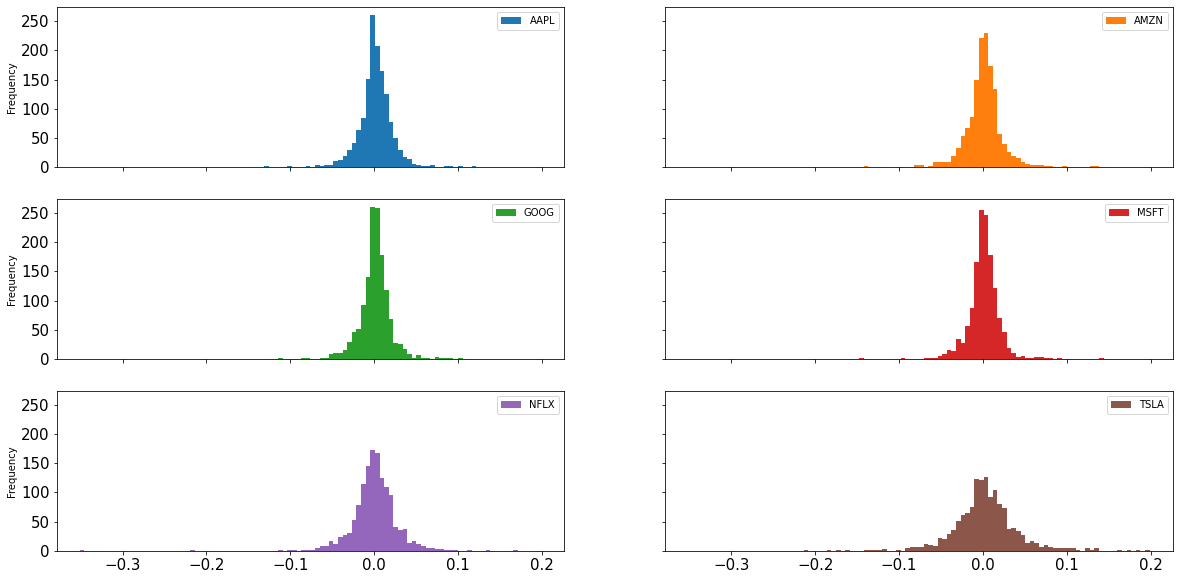

In [15]:
ret = close.pct_change().dropna()
ret.plot(figsize=(20,10),fontsize=15, kind="hist",bins=100,subplots=True,layout=(3,2),sharex=True,sharey=True)
plt.show()

In [32]:
summary = ret.describe().T.loc[:,["mean","std"]]
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)

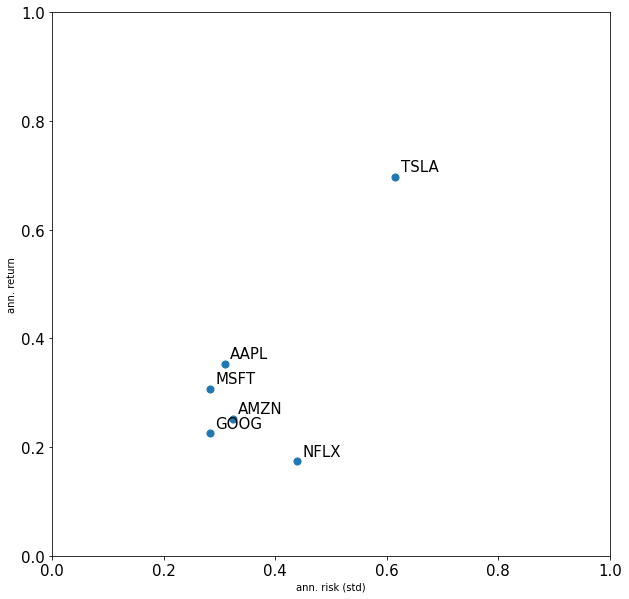

In [33]:
summary.plot(figsize = (10,10),fontsize=15, kind="scatter",x="std",y="mean",legend=True,s=50,
        xlabel="ann. risk (std)",ylabel="ann. return")
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.01,summary.loc[i,"mean"]+0.01),size=15)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Plotting

Se separate document for a more comprehensive guide to plotting with pandas

In [5]:
import matplotlib.pyplot as plt

In [ ]:
temp.plot(figsize=[14,7])
plt.show

In [ ]:
temp.plot(figsize=[14,7], subplots=True, layout=(1,2),sharey=True)
plt.show